<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Deep-Learning/blob/main/P02_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

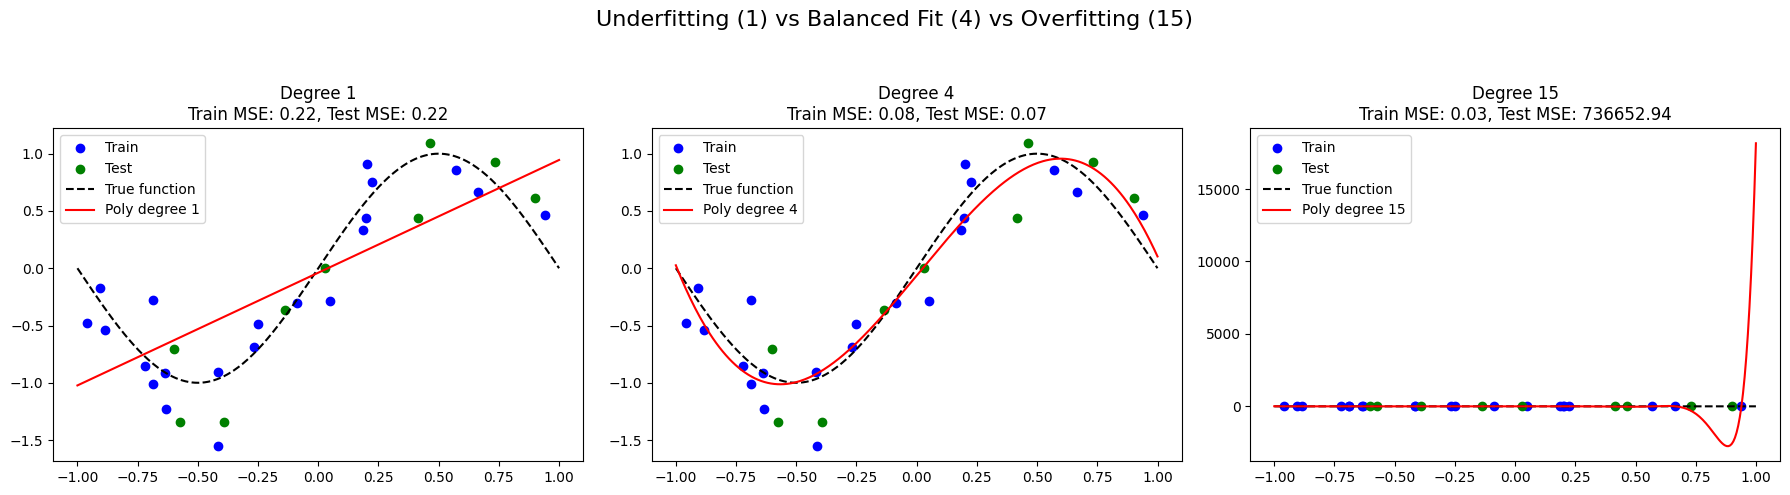

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate synthetic data with higher noise and fewer samples
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 2 - 1, axis=0)  # X in [-1, 1]
y_true = np.sin(np.pi * X).ravel()
y = y_true + np.random.randn(30) * 0.3  # higher noise

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define degrees to visualize underfitting, proper fit, and overfitting
degrees = [1, 4, 15]

plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees, 1):
    # Step 5: Transform inputs
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_curve = np.linspace(-1, 1, 300).reshape(-1, 1)
    X_curve_poly = poly.transform(X_curve)

    # Step 6: Fit linear model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 7: Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_curve_pred = model.predict(X_curve_poly)

    # Step 8: Calculate error and R²
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Step 9: Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')
    plt.plot(X_curve, np.sin(np.pi * X_curve), 'k--', label='True function')
    plt.plot(X_curve, y_curve_pred, 'r-', label=f'Poly degree {degree}')
    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    plt.legend()

plt.suptitle("Underfitting (1) vs Balanced Fit (4) vs Overfitting (15)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
